In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_validate,cross_val_predict,cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

! git clone https://stephanieli333:colonp:P00oo@github.com/stephanieli333/comp551a2.git

print("loading")
reviews_train = load_files("comp551a2/aclImdb/train")
reviews_test = load_files("comp551a2/aclImdb/test")
print("setting")
X_train, y_train = reviews_train.data, reviews_train.target
X_test, y_test = reviews_test.data, reviews_test.target
print("replacing")
X_train = [doc.replace(b"<br />", b" ") for doc in X_train]
X_test = [doc.replace(b"<br />", b" ") for doc in X_test]
print("vectorizing")
vectorizer = TfidfVectorizer(min_df=5, norm='l2').fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

Cloning into 'comp551a2'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 49684 (delta 27), reused 38 (delta 17), pack-reused 49634
Receiving objects: 100% (49684/49684), 60.96 MiB | 10.32 MiB/s, done.
Resolving deltas: 100% (39/39), done.
Checking out files: 100% (146493/146493), done.
loading
setting
replacing
vectorizing


vectorizing


In [4]:
        from collections import OrderedDict
        criterion = 'gini'

        RANDOM_STATE = 123

        # NOTE: Setting the `warm_start` construction parameter to `True` disables
        # support for parallelized ensembles but is necessary for tracking the OOB
        # error trajectory during training.
        ensemble_clfs = [
            ("max_features='sqrt', criterion='gini'",
             RandomForestClassifier(warm_start=True, oob_score=True,
                                    max_features="sqrt",
                                    random_state=RANDOM_STATE)),
            ("max_features='sqrt', criterion='entropy'",
             RandomForestClassifier(warm_start=True, oob_score=True,
                                    max_features="sqrt",
                                    random_state=RANDOM_STATE, 
                                    criterion='entropy')),
            ("max_features='log2', criterion='gini'",
             RandomForestClassifier(warm_start=True, max_features='log2',
                                    oob_score=True,
                                    random_state=RANDOM_STATE)),
            ("max_features=None, criterion='gini'",
             RandomForestClassifier(warm_start=True, max_features=None,
                                    oob_score=True,
                                    random_state=RANDOM_STATE))
        ]

        # Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
        oob_error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

        # Range of `n_estimators` values to explore.
        min_estimators = 1
        max_estimators = 152

        for label, clf in ensemble_clfs:
            for i in range(min_estimators, max_estimators, 75):
                print(label, i)
                clf.set_params(n_estimators=i)
                clf.fit(X_train, y_train)

                # Record the OOB error for each `n_estimators=i` setting.
                oob_error = 1 - clf.oob_score_
                oob_error_rate[label].append((i, oob_error))


max_features='sqrt', criterion='gini' 1


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


max_features='sqrt', criterion='gini' 76
max_features='sqrt', criterion='gini' 151
max_features='sqrt', criterion='entropy' 1


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


max_features='sqrt', criterion='entropy' 76
max_features='sqrt', criterion='entropy' 151
max_features='log2', criterion='gini' 1


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


max_features='log2', criterion='gini' 76
max_features='log2', criterion='gini' 151
max_features=None, criterion='gini' 1


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


max_features=None, criterion='gini' 76
max_features=None, criterion='gini' 151


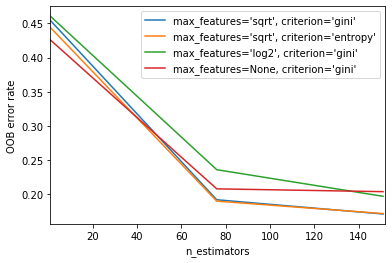

In [5]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
        for label, clf_err in oob_error_rate.items():
            xs, ys = zip(*clf_err)
            plt.plot(xs, ys, label=label)

        plt.xlim(min_estimators, max_estimators)
        plt.xlabel("n_estimators")
        plt.ylabel("OOB error rate")
        plt.legend(loc="upper right")
        plt.show()

In [6]:
    def k_fold_CV_avg(model, k = 5):
        #np.random.seed(45)  #setting random seed allows us to replicate results
        kf = KFold(n_splits=k)
        results = np.zeros((2, k))
        counter = 0
        for train_index, test_index in kf.split(X_train):
            print("Running fold #", counter + 1)
            X_training, X_valid = X_train[train_index], X_train[test_index]
            y_training, y_valid = y_train[train_index], y_train[test_index]
            model.fit(X_training, y_training)
            results[0, counter] = (model.score(X_valid, y_valid))
            counter = counter + 1
        # returns the average accuracy over k folds
        return np.average(results, axis=1)
    RANDOM_STATE = 123
    clf = RandomForestClassifier(max_features="sqrt",
                                     bootstrap=False,
                               random_state=RANDOM_STATE,
                               n_estimators=500)
    print("non-bootstrapped k-fold CV average: ", (k_fold_CV_avg(clf)[0]))

non-bootstrapped k-fold CV average:  0.85368


In [9]:
        from collections import OrderedDict
        criterion = 'gini'
        ccp_alpha = 0.0004

        RANDOM_STATE = 123

        # NOTE: Setting the `warm_start` construction parameter to `True` disables
        # support for parallelized ensembles but is necessary for tracking the OOB
        # error trajectory during training.
        ensemble_clfs = [
            ("max_features='sqrt', criterion='gini'",
             RandomForestClassifier(max_features="sqrt",
                                    random_state=RANDOM_STATE,
                                    n_estimators=500))
        ]

        print("bootstrapped k-fold CV average: ", (k_fold_CV_avg(clf)[0]))

bootstrapped k-fold CV average:  0.85368


max_features=None, criterion='gini' 150
max_features=None, criterion='gini' 200
max_features=None, criterion='gini' 250
max_features=None, criterion='gini' 300
max_features=None, criterion='gini' 350
max_features=None, criterion='gini' 400
max_features=None, criterion='gini' 450
max_features=None, criterion='gini' 500
max_features=None, criterion='gini' 550
max_features=None, criterion='gini' 600
max_features=None, criterion='gini' 650
max_features=None, criterion='gini' 700


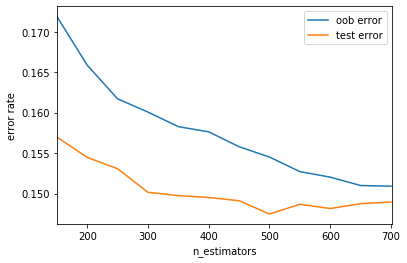

In [10]:
bestmodel = RandomForestClassifier(warm_start=True, 
                                   oob_score=True,
                                   max_features="sqrt",
                                   )

min_estimators = 150
max_estimators = 701
oob_errors=[]
test_errors=[]
for i in range(min_estimators, max_estimators, 50):
  print(label, i)
  bestmodel.set_params(n_estimators=i)
  bestmodel.fit(X_train, y_train)

                # Record the OOB error for each `n_estimators=i` setting.
  oob_error = 1 - bestmodel.oob_score_
  oob_errors.append((oob_error))
  test_error = 1 - bestmodel.score(X_test, y_test)
  test_errors.append(test_error)

plt.plot([150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700], oob_errors, label='oob error')
plt.plot([150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700], test_errors, label='test error')

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("error rate")
plt.legend(loc="upper right")
plt.show()


In [11]:
print("oob errors: ", oob_errors[7])
print("test errors: ", test_errors[7])

oob errors:  0.15452
test errors:  0.14748000000000006


1e-06
1.778279410038923e-05
0.00031622776601683794
0.005623413251903491
0.1


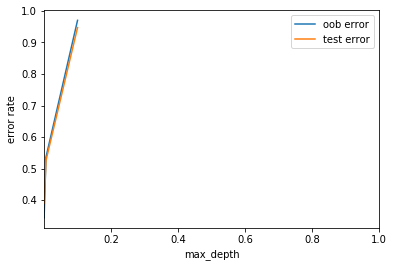

In [0]:
model = RandomForestClassifier(oob_score=True,
                                   max_features="sqrt",
                              n_estimators=500
                                   )

min_depth = 150
max_depth = 251

oob_errors=[]
test_errors=[]
for i in np.logspace(-6, -1, 5):
  print(i)
  model.set_params(ccp_alpha=i)
  model.fit(X_train, y_train)

                # Record the OOB error for each `n_estimators=i` setting.
  oob_error = 1 - model.oob_score_
  oob_errors.append((oob_error))
  test_error = 1 - model.score(X_test, y_test)
  test_errors.append(test_error)

plt.plot(np.logspace(-6, -1, 5), oob_errors, label='oob error')
plt.plot(np.logspace(-6, -1, 5), test_errors, label='test error')

plt.xlim(10e-6, 10e-3)
plt.xlabel("max_depth")
plt.ylabel("error rate")
plt.legend(loc="upper right")
plt.show()

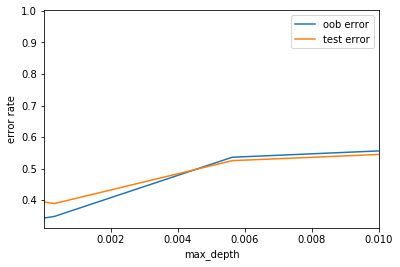

In [0]:
plt.plot(np.logspace(-6, -1, 5), oob_errors, label='oob error')
plt.plot(np.logspace(-6, -1, 5), test_errors, label='test error')

plt.xlim(10e-6, 10e-3)
plt.xlabel("max_depth")
plt.ylabel("error rate")
plt.legend(loc="upper right")
plt.show()

In [0]:
bestmodel = RandomForestClassifier(warm_start=True, 
                                   oob_score=True,
                                   max_features="sqrt",
                                   n_estimators=1500
                                   )
bestmodel.fit(X_train, y_train)
print(bestmodel.score(X_test, y_test))